In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.ndimage as nd
from scipy import fftpack
from scipy.signal import medfilt2d
from skimage.util import random_noise
from skimage.filters import threshold_otsu
from matplotlib.colors import LogNorm
import cv2

### 1. Perbaiki kecerahan gambar_1.tif menggunakan Histogram Equalization.

Text(0.5, 1.0, 'Result Image')

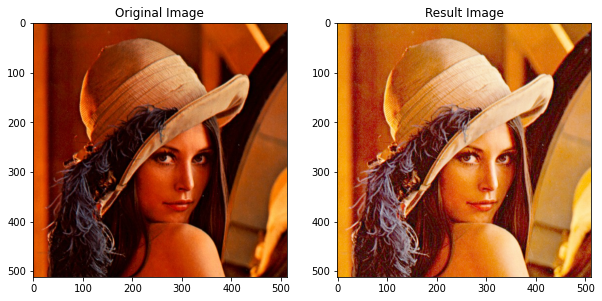

In [4]:
img1= imageio.imread('gambar_1.tif')
hist, bins= np.histogram(img1.flatten(), 256, [0, 256])

img1_r= img1[...,0]
img1_g= img1[...,1]
img1_b= img1[...,2]
  
img1_r_cdf= hist.cumsum()
img1_g_cdf= hist.cumsum() 
img1_b_cdf= hist.cumsum()

img1_r_cdf2 = np.ma.masked_equal(img1_r_cdf, 0)
img1_r_cdf2 = (img1_r_cdf2 - img1_r_cdf2.min()) * 255 / (img1_r_cdf2.max() - img1_r_cdf2.min())
img1_r_cdf_result = np.ma.filled(img1_r_cdf2, 0).astype('uint8')

img1_g_cdf2 = np.ma.masked_equal(img1_g_cdf, 0)
img1_g_cdf2 = (img1_g_cdf2 - img1_g_cdf2.min()) * 255 / (img1_g_cdf2.max() - img1_g_cdf2.min())
img1_g_cdf_result = np.ma.filled(img1_g_cdf2, 0).astype('uint8')

img1_b_cdf2 = np.ma.masked_equal(img1_b_cdf, 0)
img1_b_cdf2 = (img1_b_cdf2 - img1_b_cdf2.min()) * 255 / (img1_b_cdf2.max() - img1_b_cdf2.min())
img1_b_cdf_result = np.ma.filled(img1_b_cdf2, 0).astype('uint8')

img1_r_new= img1_b_cdf_result[img1_r]
img1_g_new= img1_g_cdf_result[img1_g]
img1_b_new= img1_r_cdf_result[img1_b]

img1_result= np.dstack((img1_r_new, img1_g_new, img1_b_new))

fig, ax= plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img1)
ax[0].set_title('Original Image')

ax[1].imshow(img1_result)
ax[1].set_title('Result Image')

### 2. Tampilkan ke delapan bit plane dari gambar_2.tif.

Text(0.5, 1.0, 'Eight Bit Plane')

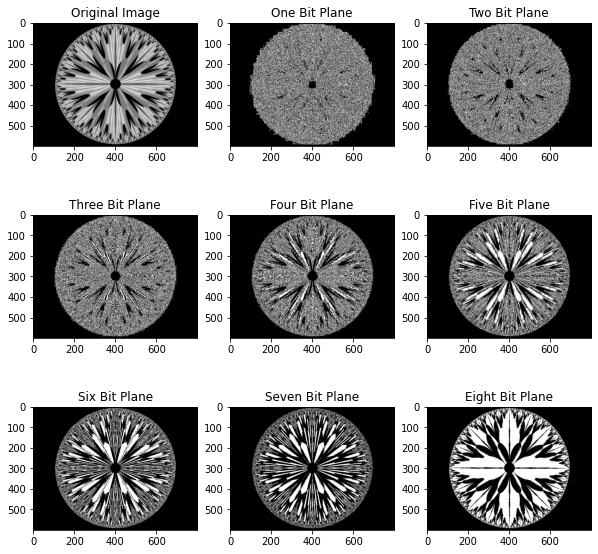

In [33]:
img2= imageio.imread('gambar_2.tif')

lst= []
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
         lst.append(np.binary_repr(img2[i][j],width=8))
            
img2_one_bit= (np.array([int(i[7]) for i in lst], dtype=np.uint8)*1).reshape(img2.shape[0], img2.shape[1])
img2_two_bit= (np.array([int(i[6]) for i in lst], dtype=np.uint8)*2).reshape(img2.shape[0], img2.shape[1])
img2_three_bit= (np.array([int(i[5]) for i in lst], dtype=np.uint8)*4).reshape(img2.shape[0], img2.shape[1])
img2_four_bit= (np.array([int(i[4]) for i in lst], dtype=np.uint8)*8).reshape(img2.shape[0], img2.shape[1])
img2_five_bit= (np.array([int(i[3]) for i in lst], dtype=np.uint8)*16).reshape(img2.shape[0], img2.shape[1])
img2_six_bit= (np.array([int(i[2]) for i in lst], dtype=np.uint8)*32).reshape(img2.shape[0], img2.shape[1])
img2_seven_bit= (np.array([int(i[1]) for i in lst], dtype=np.uint8)*64).reshape(img2.shape[0], img2.shape[1])
img2_eight_bit= (np.array([int(i[0]) for i in lst], dtype=np.uint8)*128).reshape(img2.shape[0], img2.shape[1])

fig, ax= plt.subplots(3,3, figsize=(10,10))
ax[0][0].imshow(img2, cmap='gray')
ax[0][0].set_title('Original Image')

ax[0][1].imshow(img2_one_bit, cmap='gray')
ax[0][1].set_title('One Bit Plane')

ax[0][2].imshow(img2_two_bit, cmap='gray')
ax[0][2].set_title('Two Bit Plane')

ax[1][0].imshow(img2_three_bit, cmap='gray')
ax[1][0].set_title('Three Bit Plane')

ax[1][1].imshow(img2_four_bit, cmap='gray')
ax[1][1].set_title('Four Bit Plane')

ax[1][2].imshow(img2_five_bit, cmap='gray')
ax[1][2].set_title('Five Bit Plane')

ax[2][0].imshow(img2_six_bit, cmap='gray')
ax[2][0].set_title('Six Bit Plane')

ax[2][1].imshow(img2_seven_bit, cmap='gray')
ax[2][1].set_title('Seven Bit Plane')

ax[2][2].imshow(img2_eight_bit,cmap='gray')
ax[2][2].set_title('Eight Bit Plane')


### 3. Rekonstruksi gambar_3.tif menggunakan Mean Filter dan Median Filter.

Text(0.5, 1.0, 'Median Filtered Image')

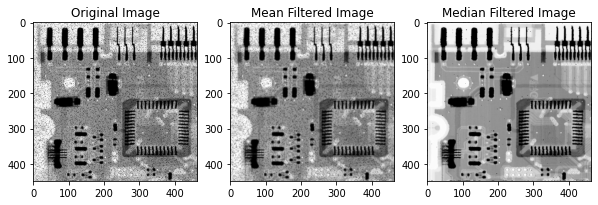

In [42]:
img3= imageio.imread('gambar_3.tif')

img3_mean= nd.convolve(img3, (np.zeros((3,3))+(1/9)))
img3_median= medfilt2d(img3, [3,3])

fig, ax= plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img3, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img3_mean, cmap="gray")
ax[1].set_title('Mean Filtered Image')

ax[2].imshow(img3_median, cmap='gray')
ax[2].set_title("Median Filtered Image")

### 4. Transformasi gambar_1.tif menjadi YCbCr, kemudian lakukan deteksi tepi menggunakan filter sobel.

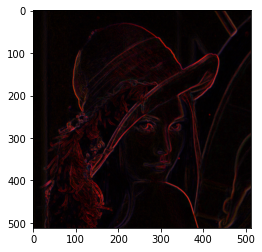

In [43]:
def sobel(indata):
    gh= nd.sobel(indata +0., axis=0)
    gv= nd.sobel(indata+0., axis=1)
    edj= abs(gh)+abs(gv)
    return edj

def rgb_to_ycbcr(im):
    xform= np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr= im.dot(xform.T)
    ycbcr[:,:,[1,2]]+= 128
    return np.uint8(ycbcr)


img4= imageio.imread('gambar_1.tif')
img4_ycbr= rgb_to_ycbcr(img4)

img_4_r= img4_ycbr[...,0]
img_4_g= img4_ycbr[...,1]
img_4_b= img4_ycbr[...,2]

img_4_r_sobel= sobel(img_4_r)
img_4_g_sobel= sobel(img_4_g)
img_4_b_sobel= sobel(img_4_b)

img_4_temp= np.dstack((img_4_r_sobel,img_4_g_sobel, img_4_b_sobel))
img_4_result= img_4_temp/img_4_temp.max()

plt.imshow(img_4_result, cmap="gray")

### 5. Rekonstruksi gambar_4.tif berikut menggunakan Transformasi Fourier.

Text(0.5, 1.0, 'Result Image')

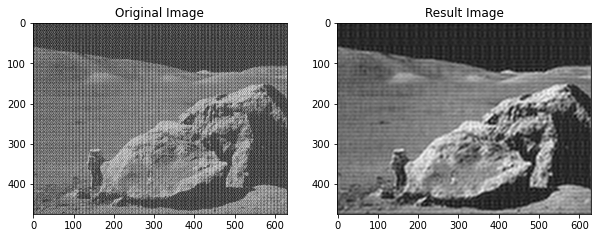

In [49]:
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

img5= imageio.imread('gambar_4.tif')
img5_fft= fftpack.fft2(img5)
img5_fft2= img5_fft.copy()

keep_fraction= 0.1
row, column= img5_fft2.shape
img5_fft2[int(row*keep_fraction):int(row*(1-keep_fraction))]= 0
img5_fft2[:, int(column*keep_fraction):int(column*(1-keep_fraction))]= 0

img5_result= fftpack.ifft2(img5_fft2).real

fig, ax= plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img5, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img5_result, cmap="gray")
ax[1].set_title("Result Image")

### 6. Gunakan transformasi Hough sedemikian sehingga seluruh pola garis pada gambar_5.tif.dapat di deteksi.

Text(0.5, 1.0, 'Drawed Lines')

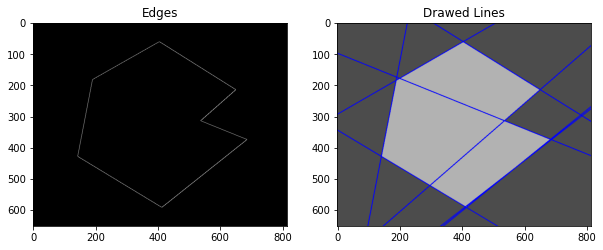

In [53]:
img6 = cv2.imread('gambar_5.tif')
gray = cv2.cvtColor(img6,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,580,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,110)

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img6, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(edges, cmap='gray')
ax[0].set_title('Edges')

ax[1].imshow(img6, cmap='gray')
ax[1].set_title('Drawed Lines')  

### 7. Gunakan metode Otsu untuk segmentasi gambar yang diperoleh pada soal gambar_6.tif

(-0.5, 713.5, 681.5, -0.5)

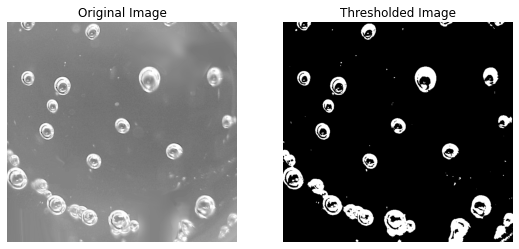

In [58]:
img8= imageio.imread('gambar_6.tif')

thresh= threshold_otsu(img8)
binary= img8 > thresh

fig, axes= plt.subplots(ncols=2, figsize=(14, 14))

ax= axes.ravel()
ax[0], ax[1]= plt.subplot(1, 3, 1), plt.subplot(1, 3, 2)

ax[0].imshow(img8, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thressholded Image')
ax[1].axis('off')

### 8. Segementasi citra pada gambar_7.tif menggunakan kmean claster dengan k=3.

Text(0.5, 1.0, 'Result Image')

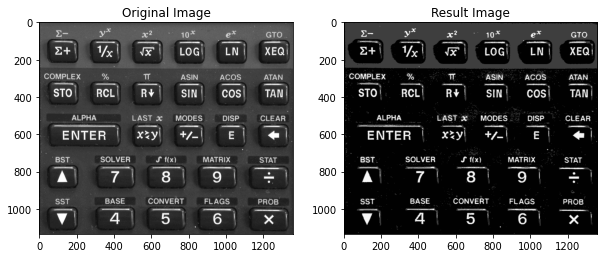

In [71]:
img8= imageio.imread('gambar_7.tif')

pixel_vals= img8.reshape((-1,3))
pixel_vals= np.float32(pixel_vals)

criteria= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1)

k= 3
_, labels, (centers)= cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers= np.uint8(centers)

img_8_data= centers[labels.flatten()]
img_8_result= img_8_data.reshape((img8.shape))

fig, ax= plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img8, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_8_result, cmap='gray')
ax[1].set_title('Result Image')